In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
import scipy.signal as ss
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib notebook

In [3]:
overwrite_csv = False

folder = 'data/IPTS_20440'
spectra_file = 'spectra.txt'
data_file1 = 'Ta_80C_12pC.csv'
norm_to_file = 'OB_80C_12pC.csv'
baseline = False
baseline_deg = 3

norm_factor = 1

image_start = None  # Can be omitted or =None
image_end = None  # Can be omitted or =None

source_to_detector_m = 16.46
offset_us = 0  

In [4]:
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=baseline,
                         baseline_deg=baseline_deg,
                         source_to_detector_m=source_to_detector_m,
                         offset_us=offset_us
                        )
experiment1.norm_to(file=norm_to_file, norm_factor=norm_factor)
experiment1.slice(start=image_start, end=image_end)

simulation = Simulation(energy_min=7.5, energy_max=15, energy_step=0.01, database='ENDF_VIII')
simulation.add_layer(layer='Ta', thickness_mm=0.127)

In [5]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=False,
#                                  proton_params={'sigma':500},
                                )
x_n = simulation.x_tof_us
y_n = simulation.y_att

/Users/Shawn/anaconda3/envs/py37/lib/python3.7/site-packages/lmfit/models.py:34: FutureWarning:


The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.



Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(2.220446049250313e-16, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
❌ No previous TOF neutron beam shape file named '/Users/Shawn/Documents/GitHub/ResoFit/ResoFi

9.08 (eV) neutron spent 394.88693288322133 (us)
9.09 (eV) neutron spent 394.6696635777043 (us)
9.1 (eV) neutron spent 394.45275250686643 (us)
9.11 (eV) neutron spent 394.23619868735676 (us)
9.12 (eV) neutron spent 394.0200011395992 (us)
9.13 (eV) neutron spent 393.80415888777384 (us)
9.14 (eV) neutron spent 393.5886709597989 (us)
9.15 (eV) neutron spent 393.37353638731133 (us)
9.16 (eV) neutron spent 393.1587542056498 (us)
9.17 (eV) neutron spent 392.94432345383547 (us)
9.18 (eV) neutron spent 392.7302431745546 (us)
9.19 (eV) neutron spent 392.51651241414015 (us)
9.2 (eV) neutron spent 392.30313022255444 (us)
9.21 (eV) neutron spent 392.0900956533708 (us)
9.22 (eV) neutron spent 391.87740776375637 (us)
9.23 (eV) neutron spent 391.66506561445453 (us)
9.24 (eV) neutron spent 391.4530682697676 (us)
9.25 (eV) neutron spent 391.24141479753877 (us)
9.26 (eV) neutron spent 391.0301042691361 (us)
9.27 (eV) neutron spent 390.8191357594344 (us)
9.28 (eV) neutron spent 390.60850834679843 (us)
9.2

11.16 (eV) neutron spent 356.19153145783406 (us)
11.17 (eV) neutron spent 356.03205460566824 (us)
11.18 (eV) neutron spent 355.872791768531 (us)
11.19 (eV) neutron spent 355.7137424681764 (us)
11.2 (eV) neutron spent 355.5549062278534 (us)
11.21 (eV) neutron spent 355.3962825722997 (us)
11.22 (eV) neutron spent 355.2378710277361 (us)
11.23 (eV) neutron spent 355.0796711218601 (us)
11.24 (eV) neutron spent 354.9216823838403 (us)
11.25 (eV) neutron spent 354.7639043443103 (us)
11.26 (eV) neutron spent 354.60633653536337 (us)
11.27 (eV) neutron spent 354.44897849054587 (us)
11.28 (eV) neutron spent 354.29182974485184 (us)
11.29 (eV) neutron spent 354.13488983471746 (us)
11.3 (eV) neutron spent 353.9781582980146 (us)
11.31 (eV) neutron spent 353.821634674046 (us)
11.32 (eV) neutron spent 353.66531850353897 (us)
11.33 (eV) neutron spent 353.50920932863977 (us)
11.34 (eV) neutron spent 353.3533066929082 (us)
11.35 (eV) neutron spent 353.197610141312 (us)
11.36 (eV) neutron spent 353.04211922

13.02 (eV) neutron spent 329.76927919242985 (us)
13.03 (eV) neutron spent 329.6427125866578 (us)
13.04 (eV) neutron spent 329.5162915992331 (us)
13.05 (eV) neutron spent 329.39001595113984 (us)
13.06 (eV) neutron spent 329.2638853641103 (us)
13.07 (eV) neutron spent 329.13789956062146 (us)
13.08 (eV) neutron spent 329.0120582638938 (us)
13.09 (eV) neutron spent 328.8863611978874 (us)
13.1 (eV) neutron spent 328.76080808730035 (us)
13.11 (eV) neutron spent 328.63539865756576 (us)
13.12 (eV) neutron spent 328.5101326348493 (us)
13.13 (eV) neutron spent 328.3850097460466 (us)
13.14 (eV) neutron spent 328.26002971878125 (us)
13.15 (eV) neutron spent 328.1351922814015 (us)
13.16 (eV) neutron spent 328.01049716297854 (us)
13.17 (eV) neutron spent 327.88594409330346 (us)
13.18 (eV) neutron spent 327.76153280288537 (us)
13.19 (eV) neutron spent 327.6372630229482 (us)
13.2 (eV) neutron spent 327.513134485429 (us)
13.21 (eV) neutron spent 327.389146922975 (us)
13.22 (eV) neutron spent 327.265300

14.83 (eV) neutron spent 308.99048893900965 (us)
14.84 (eV) neutron spent 308.886364087211 (us)
14.85 (eV) neutron spent 308.7823444297448 (us)
14.86 (eV) neutron spent 308.67842978960556 (us)
14.87 (eV) neutron spent 308.57461999020444 (us)
14.88 (eV) neutron spent 308.47091485536833 (us)
14.89 (eV) neutron spent 308.3673142093379 (us)
14.9 (eV) neutron spent 308.2638178767671 (us)
14.91 (eV) neutron spent 308.1604256827212 (us)
14.92 (eV) neutron spent 308.0571374526763 (us)
14.93 (eV) neutron spent 307.9539530125173 (us)
14.94 (eV) neutron spent 307.8508721885374 (us)
14.95 (eV) neutron spent 307.7478948074364 (us)
14.96 (eV) neutron spent 307.64502069631953 (us)
14.97 (eV) neutron spent 307.5422496826965 (us)
14.98 (eV) neutron spent 307.43958159447993 (us)
14.99 (eV) neutron spent 307.33701625998447 (us)
15.0 (eV) neutron spent 307.2345535079253 (us)
Making shape for:
7.5 (eV) neutron ...
7.51 (eV) neutron ...
7.52 (eV) neutron ...
7.53 (eV) neutron ...
7.54 (eV) neutron ...
7.55 

10.9 (eV) neutron ...
10.91 (eV) neutron ...
10.92 (eV) neutron ...
10.93 (eV) neutron ...
10.94 (eV) neutron ...
10.95 (eV) neutron ...
10.96 (eV) neutron ...
10.97 (eV) neutron ...
10.98 (eV) neutron ...
10.99 (eV) neutron ...
11.0 (eV) neutron ...
11.01 (eV) neutron ...
11.02 (eV) neutron ...
11.03 (eV) neutron ...
11.04 (eV) neutron ...
11.05 (eV) neutron ...
11.06 (eV) neutron ...
11.07 (eV) neutron ...
11.08 (eV) neutron ...
11.09 (eV) neutron ...
11.1 (eV) neutron ...
11.11 (eV) neutron ...
11.12 (eV) neutron ...
11.13 (eV) neutron ...
11.14 (eV) neutron ...
11.15 (eV) neutron ...
11.16 (eV) neutron ...
11.17 (eV) neutron ...
11.18 (eV) neutron ...
11.19 (eV) neutron ...
11.2 (eV) neutron ...
11.21 (eV) neutron ...
11.22 (eV) neutron ...
11.23 (eV) neutron ...
11.24 (eV) neutron ...
11.25 (eV) neutron ...
11.26 (eV) neutron ...
11.27 (eV) neutron ...
11.28 (eV) neutron ...
11.29 (eV) neutron ...
11.3 (eV) neutron ...
11.31 (eV) neutron ...
11.32 (eV) neutron ...
11.33 (eV) neutr

14.5 (eV) neutron ...
14.51 (eV) neutron ...
14.52 (eV) neutron ...
14.53 (eV) neutron ...
14.54 (eV) neutron ...
14.55 (eV) neutron ...
14.56 (eV) neutron ...
14.57 (eV) neutron ...
14.58 (eV) neutron ...
14.59 (eV) neutron ...
14.6 (eV) neutron ...
14.61 (eV) neutron ...
14.62 (eV) neutron ...
14.63 (eV) neutron ...
14.64 (eV) neutron ...
14.65 (eV) neutron ...
14.66 (eV) neutron ...
14.67 (eV) neutron ...
14.68 (eV) neutron ...
14.69 (eV) neutron ...
14.7 (eV) neutron ...
14.71 (eV) neutron ...
14.72 (eV) neutron ...
14.73 (eV) neutron ...
14.74 (eV) neutron ...
14.75 (eV) neutron ...
14.76 (eV) neutron ...
14.77 (eV) neutron ...
14.78 (eV) neutron ...
14.79 (eV) neutron ...
14.8 (eV) neutron ...
14.81 (eV) neutron ...
14.82 (eV) neutron ...
14.83 (eV) neutron ...
14.84 (eV) neutron ...
14.85 (eV) neutron ...
14.86 (eV) neutron ...
14.87 (eV) neutron ...
14.88 (eV) neutron ...
14.89 (eV) neutron ...
14.9 (eV) neutron ...
14.91 (eV) neutron ...
14.92 (eV) neutron ...
14.93 (eV) neutr

In [6]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True,
#                                  proton_params={'sigma':500},
                                )
x_np = simulation.x_tof_us
y_np = simulation.y_att

Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(2.220446049250313e-16, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
❌ No previous TOF neutron beam shape file named '/Users/Shawn/Documents/GitHub/ResoFit/ResoFi

9.02 (eV) neutron spent 396.1981271926115 (us)
9.03 (eV) neutron spent 395.9786876148845 (us)
9.04 (eV) neutron spent 395.7596122522709 (us)
9.05 (eV) neutron spent 395.54090009837324 (us)
9.06 (eV) neutron spent 395.32255015068324 (us)
9.07 (eV) neutron spent 395.104561410562 (us)
9.08 (eV) neutron spent 394.88693288322133 (us)
9.09 (eV) neutron spent 394.6696635777043 (us)
9.1 (eV) neutron spent 394.45275250686643 (us)
9.11 (eV) neutron spent 394.23619868735676 (us)
9.12 (eV) neutron spent 394.0200011395992 (us)
9.13 (eV) neutron spent 393.80415888777384 (us)
9.14 (eV) neutron spent 393.5886709597989 (us)
9.15 (eV) neutron spent 393.37353638731133 (us)
9.16 (eV) neutron spent 393.1587542056498 (us)
9.17 (eV) neutron spent 392.94432345383547 (us)
9.18 (eV) neutron spent 392.7302431745546 (us)
9.19 (eV) neutron spent 392.51651241414015 (us)
9.2 (eV) neutron spent 392.30313022255444 (us)
9.21 (eV) neutron spent 392.0900956533708 (us)
9.22 (eV) neutron spent 391.87740776375637 (us)
9.23 

10.81 (eV) neutron spent 361.9118806377262 (us)
10.82 (eV) neutron spent 361.74459988895234 (us)
10.83 (eV) neutron spent 361.5775508844829 (us)
10.84 (eV) neutron spent 361.4107330897287 (us)
10.85 (eV) neutron spent 361.2441459718257 (us)
10.86 (eV) neutron spent 361.07778899962744 (us)
10.87 (eV) neutron spent 360.9116616436981 (us)
10.88 (eV) neutron spent 360.7457633763055 (us)
10.89 (eV) neutron spent 360.580093671414 (us)
10.9 (eV) neutron spent 360.41465200467724 (us)
10.91 (eV) neutron spent 360.2494378534315 (us)
10.92 (eV) neutron spent 360.08445069668863 (us)
10.93 (eV) neutron spent 359.91969001512933 (us)
10.94 (eV) neutron spent 359.7551552910957 (us)
10.95 (eV) neutron spent 359.59084600858534 (us)
10.96 (eV) neutron spent 359.42676165324383 (us)
10.97 (eV) neutron spent 359.2629017123579 (us)
10.98 (eV) neutron spent 359.0992656748495 (us)
10.99 (eV) neutron spent 358.93585303126827 (us)
11.0 (eV) neutron spent 358.7726632737852 (us)
11.01 (eV) neutron spent 358.609695

12.62 (eV) neutron spent 334.95464875490364 (us)
12.63 (eV) neutron spent 334.82201970644326 (us)
12.64 (eV) neutron spent 334.6895480811963 (us)
12.65 (eV) neutron spent 334.5572335679877 (us)
12.66 (eV) neutron spent 334.42507585650367 (us)
12.67 (eV) neutron spent 334.2930746372873 (us)
12.68 (eV) neutron spent 334.1612296017362 (us)
12.69 (eV) neutron spent 334.02954044209935 (us)
12.7 (eV) neutron spent 333.8980068514739 (us)
12.71 (eV) neutron spent 333.76662852380224 (us)
12.72 (eV) neutron spent 333.63540515386944 (us)
12.73 (eV) neutron spent 333.50433643729934 (us)
12.74 (eV) neutron spent 333.3734220705527 (us)
12.75 (eV) neutron spent 333.2426617509232 (us)
12.76 (eV) neutron spent 333.1120551765354 (us)
12.77 (eV) neutron spent 332.98160204634127 (us)
12.78 (eV) neutron spent 332.85130206011706 (us)
12.79 (eV) neutron spent 332.72115491846125 (us)
12.8 (eV) neutron spent 332.5911603227909 (us)
12.81 (eV) neutron spent 332.4613179753391 (us)
12.82 (eV) neutron spent 332.331

14.38 (eV) neutron spent 313.7879371074445 (us)
14.39 (eV) neutron spent 313.67888829890126 (us)
14.4 (eV) neutron spent 313.5699531025969 (us)
14.41 (eV) neutron spent 313.4611313213907 (us)
14.42 (eV) neutron spent 313.3524227586204 (us)
14.43 (eV) neutron spent 313.24382721810093 (us)
14.44 (eV) neutron spent 313.1353445041227 (us)
14.45 (eV) neutron spent 313.02697442145023 (us)
14.46 (eV) neutron spent 312.9187167753209 (us)
14.47 (eV) neutron spent 312.810571371443 (us)
14.48 (eV) neutron spent 312.70253801599466 (us)
14.49 (eV) neutron spent 312.59461651562214 (us)
14.5 (eV) neutron spent 312.4868066774387 (us)
14.51 (eV) neutron spent 312.37910830902285 (us)
14.52 (eV) neutron spent 312.271521218417 (us)
14.53 (eV) neutron spent 312.164045214126 (us)
14.54 (eV) neutron spent 312.0566801051157 (us)
14.55 (eV) neutron spent 311.9494257008116 (us)
14.56 (eV) neutron spent 311.84228181109756 (us)
14.57 (eV) neutron spent 311.7352482463141 (us)
14.58 (eV) neutron spent 311.628324817

9.86 (eV) neutron ...
9.87 (eV) neutron ...
9.88 (eV) neutron ...
9.89 (eV) neutron ...
9.9 (eV) neutron ...
9.91 (eV) neutron ...
9.92 (eV) neutron ...
9.93 (eV) neutron ...
9.94 (eV) neutron ...
9.95 (eV) neutron ...
9.96 (eV) neutron ...
9.97 (eV) neutron ...
9.98 (eV) neutron ...
9.99 (eV) neutron ...
10.0 (eV) neutron ...
10.01 (eV) neutron ...
10.02 (eV) neutron ...
10.03 (eV) neutron ...
10.04 (eV) neutron ...
10.05 (eV) neutron ...
10.06 (eV) neutron ...
10.07 (eV) neutron ...
10.08 (eV) neutron ...
10.09 (eV) neutron ...
10.1 (eV) neutron ...
10.11 (eV) neutron ...
10.12 (eV) neutron ...
10.13 (eV) neutron ...
10.14 (eV) neutron ...
10.15 (eV) neutron ...
10.16 (eV) neutron ...
10.17 (eV) neutron ...
10.18 (eV) neutron ...
10.19 (eV) neutron ...
10.2 (eV) neutron ...
10.21 (eV) neutron ...
10.22 (eV) neutron ...
10.23 (eV) neutron ...
10.24 (eV) neutron ...
10.25 (eV) neutron ...
10.26 (eV) neutron ...
10.27 (eV) neutron ...
10.28 (eV) neutron ...
10.29 (eV) neutron ...
10.3 (

13.47 (eV) neutron ...
13.48 (eV) neutron ...
13.49 (eV) neutron ...
13.5 (eV) neutron ...
13.51 (eV) neutron ...
13.52 (eV) neutron ...
13.53 (eV) neutron ...
13.54 (eV) neutron ...
13.55 (eV) neutron ...
13.56 (eV) neutron ...
13.57 (eV) neutron ...
13.58 (eV) neutron ...
13.59 (eV) neutron ...
13.6 (eV) neutron ...
13.61 (eV) neutron ...
13.62 (eV) neutron ...
13.63 (eV) neutron ...
13.64 (eV) neutron ...
13.65 (eV) neutron ...
13.66 (eV) neutron ...
13.67 (eV) neutron ...
13.68 (eV) neutron ...
13.69 (eV) neutron ...
13.7 (eV) neutron ...
13.71 (eV) neutron ...
13.72 (eV) neutron ...
13.73 (eV) neutron ...
13.74 (eV) neutron ...
13.75 (eV) neutron ...
13.76 (eV) neutron ...
13.77 (eV) neutron ...
13.78 (eV) neutron ...
13.79 (eV) neutron ...
13.8 (eV) neutron ...
13.81 (eV) neutron ...
13.82 (eV) neutron ...
13.83 (eV) neutron ...
13.84 (eV) neutron ...
13.85 (eV) neutron ...
13.86 (eV) neutron ...
13.87 (eV) neutron ...
13.88 (eV) neutron ...
13.89 (eV) neutron ...
13.9 (eV) neutr

In [7]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True,
                                 proton_params={'sigma':300},
                                )
x_np300 = simulation.x_tof_us
y_np300 = simulation.y_att

Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(2.220446049250313e-16, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
❌ No previous TOF neutron beam shape file named '/Users/Shawn/Documents/GitHub/ResoFit/ResoFi

9.11 (eV) neutron spent 394.23619868735676 (us)
9.12 (eV) neutron spent 394.0200011395992 (us)
9.13 (eV) neutron spent 393.80415888777384 (us)
9.14 (eV) neutron spent 393.5886709597989 (us)
9.15 (eV) neutron spent 393.37353638731133 (us)
9.16 (eV) neutron spent 393.1587542056498 (us)
9.17 (eV) neutron spent 392.94432345383547 (us)
9.18 (eV) neutron spent 392.7302431745546 (us)
9.19 (eV) neutron spent 392.51651241414015 (us)
9.2 (eV) neutron spent 392.30313022255444 (us)
9.21 (eV) neutron spent 392.0900956533708 (us)
9.22 (eV) neutron spent 391.87740776375637 (us)
9.23 (eV) neutron spent 391.66506561445453 (us)
9.24 (eV) neutron spent 391.4530682697676 (us)
9.25 (eV) neutron spent 391.24141479753877 (us)
9.26 (eV) neutron spent 391.0301042691361 (us)
9.27 (eV) neutron spent 390.8191357594344 (us)
9.28 (eV) neutron spent 390.60850834679843 (us)
9.29 (eV) neutron spent 390.3982211130667 (us)
9.3 (eV) neutron spent 390.1882731435334 (us)
9.31 (eV) neutron spent 389.9786635269329 (us)
9.32 

10.85 (eV) neutron spent 361.2441459718257 (us)
10.86 (eV) neutron spent 361.07778899962744 (us)
10.87 (eV) neutron spent 360.9116616436981 (us)
10.88 (eV) neutron spent 360.7457633763055 (us)
10.89 (eV) neutron spent 360.580093671414 (us)
10.9 (eV) neutron spent 360.41465200467724 (us)
10.91 (eV) neutron spent 360.2494378534315 (us)
10.92 (eV) neutron spent 360.08445069668863 (us)
10.93 (eV) neutron spent 359.91969001512933 (us)
10.94 (eV) neutron spent 359.7551552910957 (us)
10.95 (eV) neutron spent 359.59084600858534 (us)
10.96 (eV) neutron spent 359.42676165324383 (us)
10.97 (eV) neutron spent 359.2629017123579 (us)
10.98 (eV) neutron spent 359.0992656748495 (us)
10.99 (eV) neutron spent 358.93585303126827 (us)
11.0 (eV) neutron spent 358.7726632737852 (us)
11.01 (eV) neutron spent 358.609695896186 (us)
11.02 (eV) neutron spent 358.4469503938648 (us)
11.03 (eV) neutron spent 358.28442626381695 (us)
11.04 (eV) neutron spent 358.1221230046329 (us)
11.05 (eV) neutron spent 357.9600401

12.64 (eV) neutron spent 334.6895480811963 (us)
12.65 (eV) neutron spent 334.5572335679877 (us)
12.66 (eV) neutron spent 334.42507585650367 (us)
12.67 (eV) neutron spent 334.2930746372873 (us)
12.68 (eV) neutron spent 334.1612296017362 (us)
12.69 (eV) neutron spent 334.02954044209935 (us)
12.7 (eV) neutron spent 333.8980068514739 (us)
12.71 (eV) neutron spent 333.76662852380224 (us)
12.72 (eV) neutron spent 333.63540515386944 (us)
12.73 (eV) neutron spent 333.50433643729934 (us)
12.74 (eV) neutron spent 333.3734220705527 (us)
12.75 (eV) neutron spent 333.2426617509232 (us)
12.76 (eV) neutron spent 333.1120551765354 (us)
12.77 (eV) neutron spent 332.98160204634127 (us)
12.78 (eV) neutron spent 332.85130206011706 (us)
12.79 (eV) neutron spent 332.72115491846125 (us)
12.8 (eV) neutron spent 332.5911603227909 (us)
12.81 (eV) neutron spent 332.4613179753391 (us)
12.82 (eV) neutron spent 332.33162757915204 (us)
12.83 (eV) neutron spent 332.2020888380861 (us)
12.84 (eV) neutron spent 332.0727

14.45 (eV) neutron spent 313.02697442145023 (us)
14.46 (eV) neutron spent 312.9187167753209 (us)
14.47 (eV) neutron spent 312.810571371443 (us)
14.48 (eV) neutron spent 312.70253801599466 (us)
14.49 (eV) neutron spent 312.59461651562214 (us)
14.5 (eV) neutron spent 312.4868066774387 (us)
14.51 (eV) neutron spent 312.37910830902285 (us)
14.52 (eV) neutron spent 312.271521218417 (us)
14.53 (eV) neutron spent 312.164045214126 (us)
14.54 (eV) neutron spent 312.0566801051157 (us)
14.55 (eV) neutron spent 311.9494257008116 (us)
14.56 (eV) neutron spent 311.84228181109756 (us)
14.57 (eV) neutron spent 311.7352482463141 (us)
14.58 (eV) neutron spent 311.6283248172568 (us)
14.59 (eV) neutron spent 311.52151133517566 (us)
14.6 (eV) neutron spent 311.4148076117731 (us)
14.61 (eV) neutron spent 311.3082134592026 (us)
14.62 (eV) neutron spent 311.20172869006734 (us)
14.63 (eV) neutron spent 311.0953531174192 (us)
14.64 (eV) neutron spent 310.9890865547569 (us)
14.65 (eV) neutron spent 310.882928816

10.08 (eV) neutron ...
10.09 (eV) neutron ...
10.1 (eV) neutron ...
10.11 (eV) neutron ...
10.12 (eV) neutron ...
10.13 (eV) neutron ...
10.14 (eV) neutron ...
10.15 (eV) neutron ...
10.16 (eV) neutron ...
10.17 (eV) neutron ...
10.18 (eV) neutron ...
10.19 (eV) neutron ...
10.2 (eV) neutron ...
10.21 (eV) neutron ...
10.22 (eV) neutron ...
10.23 (eV) neutron ...
10.24 (eV) neutron ...
10.25 (eV) neutron ...
10.26 (eV) neutron ...
10.27 (eV) neutron ...
10.28 (eV) neutron ...
10.29 (eV) neutron ...
10.3 (eV) neutron ...
10.31 (eV) neutron ...
10.32 (eV) neutron ...
10.33 (eV) neutron ...
10.34 (eV) neutron ...
10.35 (eV) neutron ...
10.36 (eV) neutron ...
10.37 (eV) neutron ...
10.38 (eV) neutron ...
10.39 (eV) neutron ...
10.4 (eV) neutron ...
10.41 (eV) neutron ...
10.42 (eV) neutron ...
10.43 (eV) neutron ...
10.44 (eV) neutron ...
10.45 (eV) neutron ...
10.46 (eV) neutron ...
10.47 (eV) neutron ...
10.48 (eV) neutron ...
10.49 (eV) neutron ...
10.5 (eV) neutron ...
10.51 (eV) neutr

13.72 (eV) neutron ...
13.73 (eV) neutron ...
13.74 (eV) neutron ...
13.75 (eV) neutron ...
13.76 (eV) neutron ...
13.77 (eV) neutron ...
13.78 (eV) neutron ...
13.79 (eV) neutron ...
13.8 (eV) neutron ...
13.81 (eV) neutron ...
13.82 (eV) neutron ...
13.83 (eV) neutron ...
13.84 (eV) neutron ...
13.85 (eV) neutron ...
13.86 (eV) neutron ...
13.87 (eV) neutron ...
13.88 (eV) neutron ...
13.89 (eV) neutron ...
13.9 (eV) neutron ...
13.91 (eV) neutron ...
13.92 (eV) neutron ...
13.93 (eV) neutron ...
13.94 (eV) neutron ...
13.95 (eV) neutron ...
13.96 (eV) neutron ...
13.97 (eV) neutron ...
13.98 (eV) neutron ...
13.99 (eV) neutron ...
14.0 (eV) neutron ...
14.01 (eV) neutron ...
14.02 (eV) neutron ...
14.03 (eV) neutron ...
14.04 (eV) neutron ...
14.05 (eV) neutron ...
14.06 (eV) neutron ...
14.07 (eV) neutron ...
14.08 (eV) neutron ...
14.09 (eV) neutron ...
14.1 (eV) neutron ...
14.11 (eV) neutron ...
14.12 (eV) neutron ...
14.13 (eV) neutron ...
14.14 (eV) neutron ...
14.15 (eV) neut

In [8]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True,
                                 proton_params={'sigma':500},
                                )
x_np500 = simulation.x_tof_us
y_np500 = simulation.y_att

Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(2.220446049250313e-16, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/Shawn/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
❌ No previous TOF neutron beam shape file named '/Users/Shawn/Documents/GitHub/ResoFit/ResoFi

8.99 (eV) neutron spent 396.858641339187 (us)
9.0 (eV) neutron spent 396.63810303855536 (us)
9.01 (eV) neutron spent 396.4179319957572 (us)
9.02 (eV) neutron spent 396.1981271926115 (us)
9.03 (eV) neutron spent 395.9786876148845 (us)
9.04 (eV) neutron spent 395.7596122522709 (us)
9.05 (eV) neutron spent 395.54090009837324 (us)
9.06 (eV) neutron spent 395.32255015068324 (us)
9.07 (eV) neutron spent 395.104561410562 (us)
9.08 (eV) neutron spent 394.88693288322133 (us)
9.09 (eV) neutron spent 394.6696635777043 (us)
9.1 (eV) neutron spent 394.45275250686643 (us)
9.11 (eV) neutron spent 394.23619868735676 (us)
9.12 (eV) neutron spent 394.0200011395992 (us)
9.13 (eV) neutron spent 393.80415888777384 (us)
9.14 (eV) neutron spent 393.5886709597989 (us)
9.15 (eV) neutron spent 393.37353638731133 (us)
9.16 (eV) neutron spent 393.1587542056498 (us)
9.17 (eV) neutron spent 392.94432345383547 (us)
9.18 (eV) neutron spent 392.7302431745546 (us)
9.19 (eV) neutron spent 392.51651241414015 (us)
9.2 (eV

10.74 (eV) neutron spent 363.08937999070014 (us)
10.75 (eV) neutron spent 362.9204619168963 (us)
10.76 (eV) neutron spent 362.75177937842443 (us)
10.77 (eV) neutron spent 362.5833318284184 (us)
10.78 (eV) neutron spent 362.4151187217876 (us)
10.79 (eV) neutron spent 362.24713951521016 (us)
10.8 (eV) neutron spent 362.0793936671253 (us)
10.81 (eV) neutron spent 361.9118806377262 (us)
10.82 (eV) neutron spent 361.74459988895234 (us)
10.83 (eV) neutron spent 361.5775508844829 (us)
10.84 (eV) neutron spent 361.4107330897287 (us)
10.85 (eV) neutron spent 361.2441459718257 (us)
10.86 (eV) neutron spent 361.07778899962744 (us)
10.87 (eV) neutron spent 360.9116616436981 (us)
10.88 (eV) neutron spent 360.7457633763055 (us)
10.89 (eV) neutron spent 360.580093671414 (us)
10.9 (eV) neutron spent 360.41465200467724 (us)
10.91 (eV) neutron spent 360.2494378534315 (us)
10.92 (eV) neutron spent 360.08445069668863 (us)
10.93 (eV) neutron spent 359.91969001512933 (us)
10.94 (eV) neutron spent 359.755155

12.45 (eV) neutron spent 337.2337340906034 (us)
12.46 (eV) neutron spent 337.09838038894793 (us)
12.47 (eV) neutron spent 336.9631895351496 (us)
12.48 (eV) neutron spent 336.82816120292557 (us)
12.49 (eV) neutron spent 336.69329506690724 (us)
12.5 (eV) neutron spent 336.5585908026373 (us)
12.51 (eV) neutron spent 336.4240480865664 (us)
12.52 (eV) neutron spent 336.2896665960495 (us)
12.53 (eV) neutron spent 336.1554460093438 (us)
12.54 (eV) neutron spent 336.02138600560386 (us)
12.55 (eV) neutron spent 335.88748626487967 (us)
12.56 (eV) neutron spent 335.7537464681127 (us)
12.57 (eV) neutron spent 335.62016629713315 (us)
12.58 (eV) neutron spent 335.48674543465654 (us)
12.59 (eV) neutron spent 335.35348356428096 (us)
12.6 (eV) neutron spent 335.22038037048287 (us)
12.61 (eV) neutron spent 335.08743553861524 (us)
12.62 (eV) neutron spent 334.95464875490364 (us)
12.63 (eV) neutron spent 334.82201970644326 (us)
12.64 (eV) neutron spent 334.6895480811963 (us)
12.65 (eV) neutron spent 334.5

14.22 (eV) neutron spent 315.5483320539666 (us)
14.23 (eV) neutron spent 315.4374382420534 (us)
14.24 (eV) neutron spent 315.3266612629597 (us)
14.25 (eV) neutron spent 315.21600091167926 (us)
14.26 (eV) neutron spent 315.10545698370976 (us)
14.27 (eV) neutron spent 314.9950292750502 (us)
14.28 (eV) neutron spent 314.8847175821997 (us)
14.29 (eV) neutron spent 314.774521702156 (us)
14.3 (eV) neutron spent 314.66444143241375 (us)
14.31 (eV) neutron spent 314.55447657096295 (us)
14.32 (eV) neutron spent 314.4446269162876 (us)
14.33 (eV) neutron spent 314.33489226736356 (us)
14.34 (eV) neutron spent 314.2252724236579 (us)
14.35 (eV) neutron spent 314.1157671851265 (us)
14.36 (eV) neutron spent 314.0063763522131 (us)
14.37 (eV) neutron spent 313.8970997258477 (us)
14.38 (eV) neutron spent 313.7879371074445 (us)
14.39 (eV) neutron spent 313.67888829890126 (us)
14.4 (eV) neutron spent 313.5699531025969 (us)
14.41 (eV) neutron spent 313.4611313213907 (us)
14.42 (eV) neutron spent 313.35242275

9.5 (eV) neutron ...
9.51 (eV) neutron ...
9.52 (eV) neutron ...
9.53 (eV) neutron ...
9.54 (eV) neutron ...
9.55 (eV) neutron ...
9.56 (eV) neutron ...
9.57 (eV) neutron ...
9.58 (eV) neutron ...
9.59 (eV) neutron ...
9.6 (eV) neutron ...
9.61 (eV) neutron ...
9.62 (eV) neutron ...
9.63 (eV) neutron ...
9.64 (eV) neutron ...
9.65 (eV) neutron ...
9.66 (eV) neutron ...
9.67 (eV) neutron ...
9.68 (eV) neutron ...
9.69 (eV) neutron ...
9.7 (eV) neutron ...
9.71 (eV) neutron ...
9.72 (eV) neutron ...
9.73 (eV) neutron ...
9.74 (eV) neutron ...
9.75 (eV) neutron ...
9.76 (eV) neutron ...
9.77 (eV) neutron ...
9.78 (eV) neutron ...
9.79 (eV) neutron ...
9.8 (eV) neutron ...
9.81 (eV) neutron ...
9.82 (eV) neutron ...
9.83 (eV) neutron ...
9.84 (eV) neutron ...
9.85 (eV) neutron ...
9.86 (eV) neutron ...
9.87 (eV) neutron ...
9.88 (eV) neutron ...
9.89 (eV) neutron ...
9.9 (eV) neutron ...
9.91 (eV) neutron ...
9.92 (eV) neutron ...
9.93 (eV) neutron ...
9.94 (eV) neutron ...
9.95 (eV) neutr

13.11 (eV) neutron ...
13.12 (eV) neutron ...
13.13 (eV) neutron ...
13.14 (eV) neutron ...
13.15 (eV) neutron ...
13.16 (eV) neutron ...
13.17 (eV) neutron ...
13.18 (eV) neutron ...
13.19 (eV) neutron ...
13.2 (eV) neutron ...
13.21 (eV) neutron ...
13.22 (eV) neutron ...
13.23 (eV) neutron ...
13.24 (eV) neutron ...
13.25 (eV) neutron ...
13.26 (eV) neutron ...
13.27 (eV) neutron ...
13.28 (eV) neutron ...
13.29 (eV) neutron ...
13.3 (eV) neutron ...
13.31 (eV) neutron ...
13.32 (eV) neutron ...
13.33 (eV) neutron ...
13.34 (eV) neutron ...
13.35 (eV) neutron ...
13.36 (eV) neutron ...
13.37 (eV) neutron ...
13.38 (eV) neutron ...
13.39 (eV) neutron ...
13.4 (eV) neutron ...
13.41 (eV) neutron ...
13.42 (eV) neutron ...
13.43 (eV) neutron ...
13.44 (eV) neutron ...
13.45 (eV) neutron ...
13.46 (eV) neutron ...
13.47 (eV) neutron ...
13.48 (eV) neutron ...
13.49 (eV) neutron ...
13.5 (eV) neutron ...
13.51 (eV) neutron ...
13.52 (eV) neutron ...
13.53 (eV) neutron ...
13.54 (eV) neut

In [15]:
import pandas as pd
from scipy.interpolate import interp1d

In [31]:
d = 5.2

In [14]:
df1 = pd.DataFrame()
# df1['x_n'] = x_n+1.95-d
df1['x_n'] = x_n
df1['y_n'] = y_n
df1.dropna(inplace=True)
df1.reset_index(inplace=True, drop=True)
df1

,x_n,y_n
0,128.246541,0.018150
1,128.247443,0.018150
2,128.247697,0.018150
3,128.247710,0.018150
4,128.248458,0.018150
...,...,...
36953,163.971566,0.005759
36954,163.977361,0.005759
36955,163.980180,0.005796
36956,163.985568,0.005796


In [15]:
df2 = pd.DataFrame()
df2['x_np'] = x_np+0.03-d
df2['y_np'] = y_np
df2.dropna(inplace=True)
df2.reset_index(inplace=True, drop=True)
df2

,x_np,y_np
0,127.245751,0.018150
1,127.245848,0.018150
2,127.246532,0.018150
3,127.246550,0.018150
4,127.247066,0.018150
...,...,...
35055,170.285171,0.005687
35056,170.293539,0.005722
35057,170.301909,0.005759
35058,170.310281,0.005759


In [16]:
df3 = pd.DataFrame()
df3['x_np300'] = x_np300-d
df3['y_np300'] = y_np300
df3.dropna(inplace=True)
df3.reset_index(inplace=True, drop=True)
df3

,x_np300,y_np300
0,120.376140,0.018150
1,120.376690,0.018150
2,120.377151,0.018150
3,120.377499,0.018150
4,120.377680,0.018150
...,...,...
38149,164.297029,0.005687
38150,164.305405,0.005722
38151,164.313783,0.005759
38152,164.322163,0.005759


In [17]:
df4 = pd.DataFrame()
df4['x_np500'] = x_np500-d
df4['y_np500'] = y_np500
df4.dropna(inplace=True)
df4.reset_index(inplace=True, drop=True)
df4

,x_np500,y_np500
0,120.182229,0.018150
1,120.190239,0.017839
2,120.198250,0.018058
3,120.206263,0.017765
4,120.214277,0.017601
...,...,...
38347,164.389256,0.005687
38348,164.397650,0.005722
38349,164.406045,0.005722
38350,164.414442,0.005759


In [18]:
df = pd.DataFrame()
df['x_n'] = df1['x_n']
df['y_n'] = df1['y_n']
df['x_np'] = df2['x_np']
df['y_np'] = df2['y_np']
df['x_np300'] = df3['x_np300']
df['y_np300'] = df3['y_np300']
df['x_np500'] = df4['x_np500']
df['y_np500'] = df4['y_np500']
df.dropna(inplace=True)
df

,x_n,y_n,x_np,y_np,x_np300,y_np300,x_np500,y_np500
0,128.246541,0.018150,127.245751,0.018150,120.376140,0.018150,120.182229,0.018150
1,128.247443,0.018150,127.245848,0.018150,120.376690,0.018150,120.190239,0.017839
2,128.247697,0.018150,127.246532,0.018150,120.377151,0.018150,120.198250,0.018058
3,128.247710,0.018150,127.246550,0.018150,120.377499,0.018150,120.206263,0.017765
4,128.248458,0.018150,127.247066,0.018150,120.377680,0.018150,120.214277,0.017601
...,...,...,...,...,...,...,...,...
35055,155.131795,0.040106,170.285171,0.005687,147.709181,0.040488,146.982212,0.040725
35056,155.134417,0.040105,170.293539,0.005722,147.710011,0.040488,146.985921,0.040724
35057,155.140131,0.040105,170.301909,0.005759,147.717303,0.040486,146.990510,0.040723
35058,155.142443,0.040105,170.310281,0.005759,147.718446,0.040486,146.994517,0.040722


In [19]:
t_max = 131.87
t_min = 128.54
t_step = 0.01
nbr_point = int((t_max - t_min) / t_step + 1)
ls_x = ['x_n', 'x_np', 'x_np300', 'x_np500']
ls_y = ['y_n', 'y_np', 'y_np300', 'y_np500']
df_out = pd.DataFrame()
x_axis = np.linspace(t_min, t_max, nbr_point).round(5)
df_out['x_interp'] = x_axis
for i, each in enumerate(ls_y):
    y_axis_function = interp1d(x=list(df[ls_x[i]]), y=list(df[each]), kind='cubic')
    df_out[each] = y_axis_function(x_axis)

In [20]:
df_out

,x_interp,y_n,y_np,y_np300,y_np500
0,128.54,0.021277,0.027801,0.045665,0.045717
1,128.55,0.021771,0.028229,0.045663,0.045714
2,128.56,0.022300,0.028665,0.045660,0.045711
3,128.57,0.022864,0.029109,0.045657,0.045709
4,128.58,0.023463,0.029561,0.045654,0.045706
...,...,...,...,...,...
329,131.83,0.021529,0.022256,0.044742,0.044796
330,131.84,0.021797,0.022400,0.044740,0.044793
331,131.85,0.022080,0.022557,0.044737,0.044791
332,131.86,0.022378,0.022727,0.044734,0.044788


In [55]:
df_out.to_clipboard()

In [16]:
simulation.export(x_axis='time', y_axis='attenuation', source_to_detector_m=source_to_detector_m, offset_us=2.78)

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.78
Exporting to clipboard completed.


In [18]:
experiment1.export(x_type='time', y_type='attenuation', t_unit='us')

,x,y
0,0.96,0.032947
1,1.12,0.028682
2,1.28,0.023784
3,1.44,0.020349
4,1.60,0.022276
5,1.76,0.022747
6,1.92,0.020167
7,2.08,0.018862
8,2.24,0.023378
9,2.40,0.028210


<IPython.core.display.Javascript object>


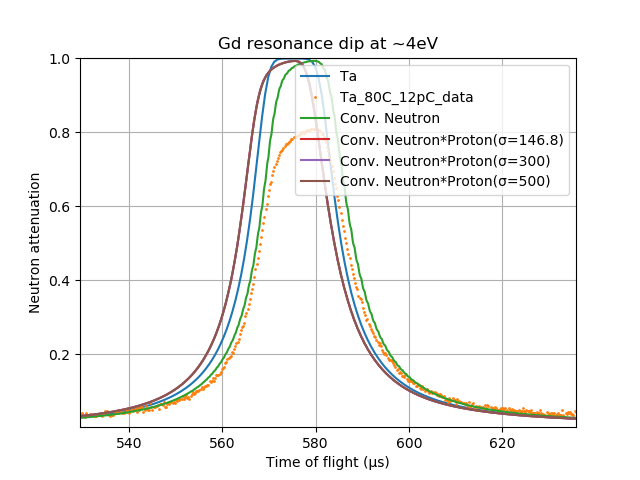

'Time (us)' was obtained with the following:
source_to_detector_m=16.46
offset_us=0


In [9]:
ax = simulation.plot(x_type='time', y_type='attenuation', source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                          mixed=False, all_layers=True)
ax = experiment1.plot(x_type='time', y_type='attenuation', t_unit='us', ax_mpl=ax)
ax.plot(x_n, y_n, label='Conv. Neutron')
ax.plot(x_np, y_np, label='Conv. Neutron*Proton(\u03C3=146.8)')
ax.plot(x_np300, y_np300, label='Conv. Neutron*Proton(\u03C3=300)')
ax.plot(x_np500, y_np500, label='Conv. Neutron*Proton(\u03C3=500)')
# experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# plt.plot(simulation.x_tof_us-5.2, 1-simulation.y_att, label='Conv. N*P(\u03C3=146.8)')
# ax.set_xlim(left=1, right=6)
ax.legend()
ax.set_title('Gd resonance dip at ~4eV')
ax.grid()

<IPython.core.display.Javascript object>


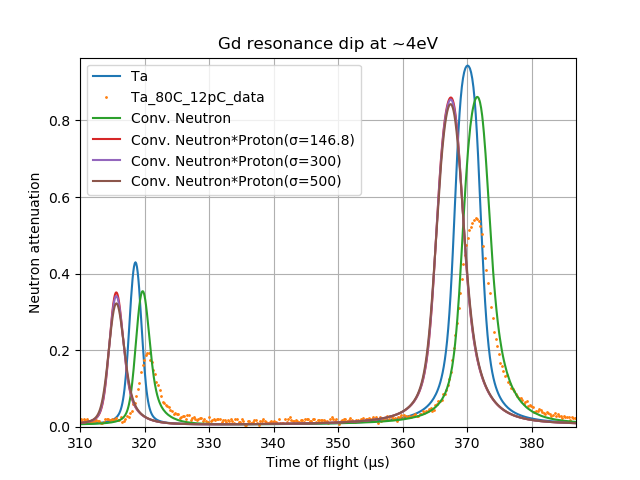

'Time (us)' was obtained with the following:
source_to_detector_m=16.46
offset_us=0


In [9]:
ax = simulation.plot(x_type='time', y_type='attenuation', source_to_detector_m=source_to_detector_m, offset_us=offset_us,
                          mixed=False, all_layers=True)
ax = experiment1.plot(x_type='time', y_type='attenuation', t_unit='us', ax_mpl=ax)
ax.plot(x_n, y_n, label='Conv. Neutron')
ax.plot(x_np, y_np, label='Conv. Neutron*Proton(\u03C3=146.8)')
ax.plot(x_np300, y_np300, label='Conv. Neutron*Proton(\u03C3=300)')
ax.plot(x_np500, y_np500, label='Conv. Neutron*Proton(\u03C3=500)')
# experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# plt.plot(simulation.x_tof_us-5.2, 1-simulation.y_att, label='Conv. N*P(\u03C3=146.8)')
# ax.set_xlim(left=1, right=6)
ax.legend()
ax.set_title('Ta resonance dip from 7-15eV')
ax.grid()

<IPython.core.display.Javascript object>


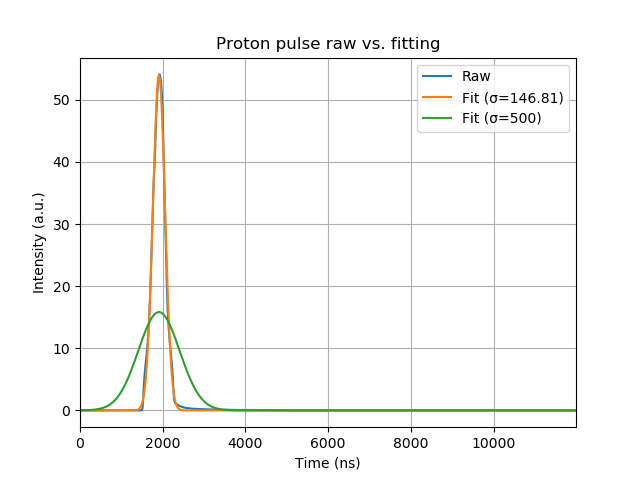

In [10]:
simulation.neutron_pulse.proton_pulse.plot()

<IPython.core.display.Javascript object>


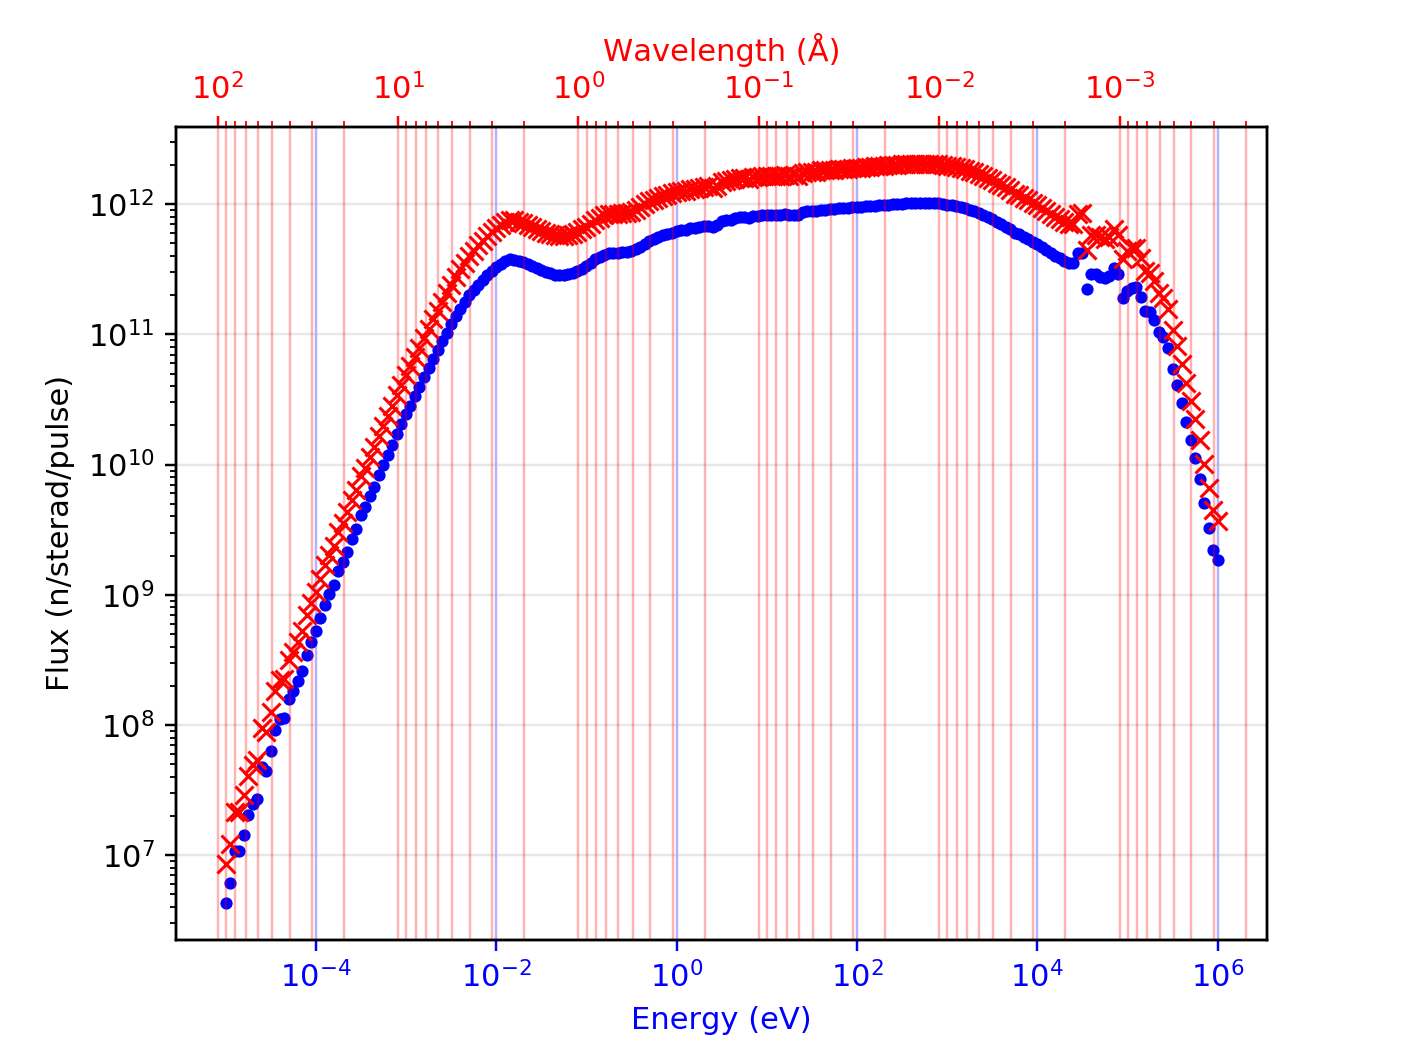

In [9]:
total_fig = simulation.neutron_pulse.plot_shape_total()